In [45]:
import tensorflow as tf
from tensorflow import keras

In [46]:
import os
import random
import numpy as np
from tqdm import tqdm
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
import random
import time
# plt.ion()

In [47]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 801
IMG_HEIGHT = 498
IMG_CHANNEL = 22

In [48]:
def get_data(file_path):
    file = open(file_path, "r")

    allText = file.read()

    words = list(map(str, allText.split()))

    matrice_height = int(len(words) / 30)
    matrice = np.ones((matrice_height, 24))

    emplacement = 20
    iter1 = 0
    for i in range(emplacement, int(len(words) / 30) + emplacement):
        iter2 = 0
        for j in range(emplacement + 6, emplacement + 30):
            matrice[(iter1, iter2)] = words[j]
            iter2 += 1
        iter1 += 1
        emplacement += 30
    X_2 = np.delete(matrice, 1, 1)
    X_final = np.delete(X_2, 10, 1)
    
    X_3D = np.zeros((22, 499, 802), dtype=np.float64)
    k = 0
    l = 0
    
    # for i in range(1): #22
            # for k in range(499):
     
    # for l in range(802):
    """
    for z in range(400198):
        X_3D[0][k][l] = X_final[z][0] 
        l += 1
        if l == 801:
            l = 0
            k += 1
    print(X_3D)
    """
    
    file.close()
    
    """
    file2 = open("training/datas/result.csv", "w+")
    for line in matrice:
        file2.write(str(line) + "\n")
    file2.close()
    print("ok")
    """
    return X_final, matrice_height

In [5]:
file_in_path = r"C_maps_in.txt"
file_out_path = r"C_maps_out.txt"

X, height_in = get_data(file_in_path)
y, height_out = get_data(file_out_path)

In [50]:
z, height_out = get_data("C_maps.txt")

In [6]:
X.shape

(400198, 22)

In [7]:
y.shape

(400198, 22)

In [8]:
X.ndim

2

In [9]:
y.ndim

2

In [10]:
X.dtype

dtype('float64')

In [11]:
y.dtype

dtype('float64')

In [12]:
X

array([[-0.64264057,  0.68043876, -3.70203868, ...,  3.58504913,
         2.33859236,  2.75976407],
       [-0.67513697,  0.66806945, -3.71266824, ...,  3.56550916,
         2.34190183,  2.77112853],
       [-0.6211995 ,  0.68046395, -3.75612656, ...,  3.57493108,
         2.29940956,  2.7689999 ],
       ...,
       [ 0.92967842,  4.12002779,  0.29319603, ...,  1.46352696,
        -2.85796579,  0.48677175],
       [ 1.07355125,  4.10820162,  0.36795086, ...,  1.40266314,
        -2.81011364,  0.3840493 ],
       [ 1.2280576 ,  4.10996362,  0.43917372, ...,  1.18002134,
        -2.75740801,  0.20137575]])

In [13]:
y

array([[-0.95929718,  3.68365993,  0.84585042, ..., -3.57637789,
        -1.02480665, -3.58957162],
       [-0.95929718,  3.68365993,  0.84585042, ..., -3.57637789,
        -1.02480665, -3.58957162],
       [-0.95929718,  3.68365993,  0.84585042, ..., -3.57637789,
        -1.02480665, -3.58957162],
       ...,
       [ 1.33669095, -1.23875073, -4.12115431, ...,  0.16092366,
        -0.67120181, -2.5944348 ],
       [ 1.33669095, -1.23875073, -4.12115431, ...,  0.16092366,
        -0.67120181, -2.5944348 ],
       [ 1.33669095, -1.23875073, -4.12115431, ...,  0.16092366,
        -0.67120181, -2.5944348 ]])

In [14]:
X_T = X.T
X_T
X_T[0]

array([-0.64264057, -0.67513697, -0.6211995 , ...,  0.92967842,
        1.07355125,  1.2280576 ])

In [51]:
z = z.T
z
z[0]

array([-1.60612403, -2.15586441, -0.82512728, ..., -2.61604206,
       -1.3549706 ,  3.84564928])

In [15]:
y_T = y.T
y_T[0]

array([-0.95929718, -0.95929718, -0.95929718, ...,  1.33669095,
        1.33669095,  1.33669095])

In [16]:
X_T.shape

(22, 400198)

In [52]:
z.shape

(22, 250000)

In [17]:
y_T.shape

(22, 400198)

In [18]:
X_T[0]

array([-0.64264057, -0.67513697, -0.6211995 , ...,  0.92967842,
        1.07355125,  1.2280576 ])

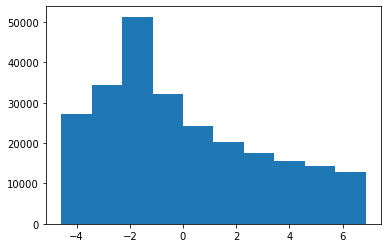

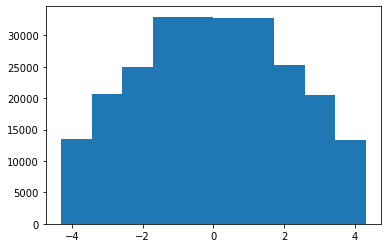

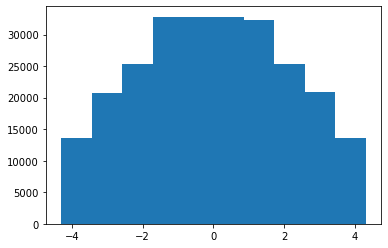

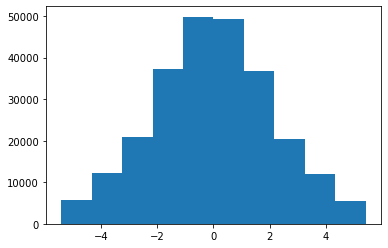

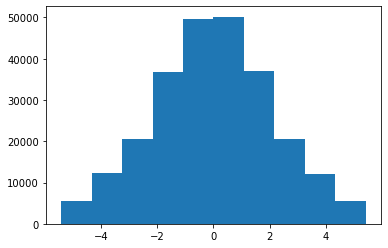

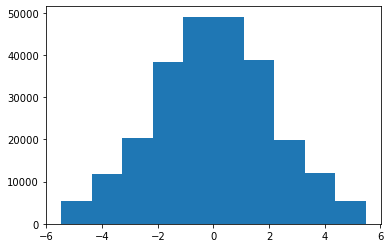

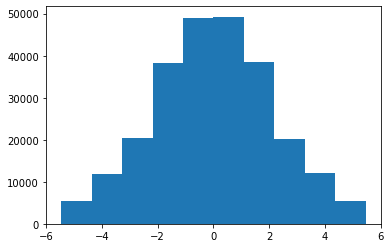

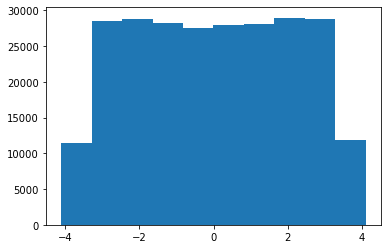

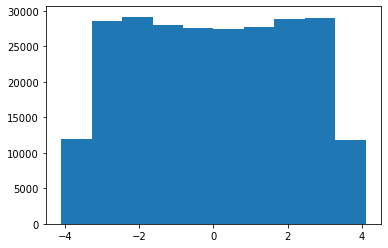

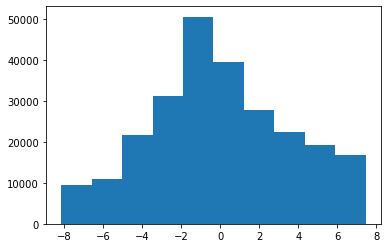

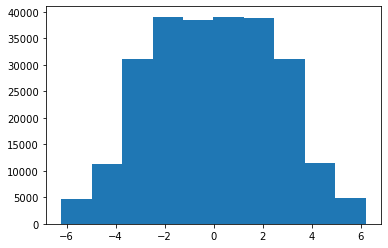

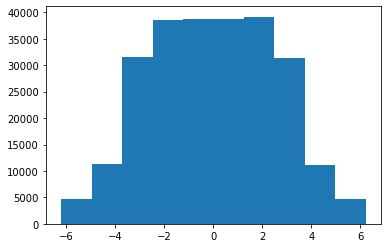

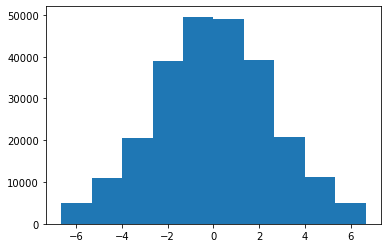

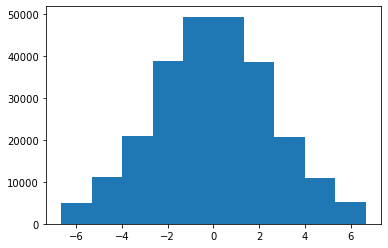

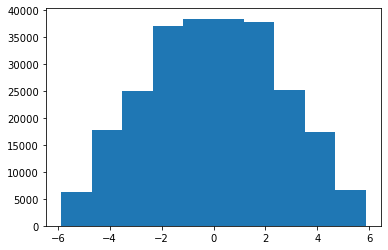

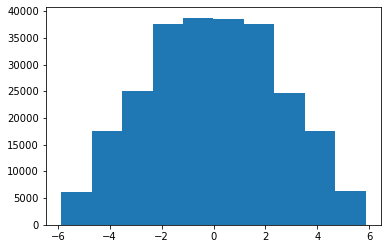

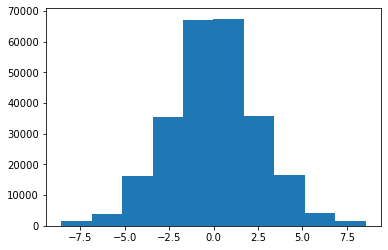

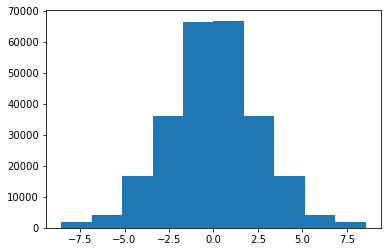

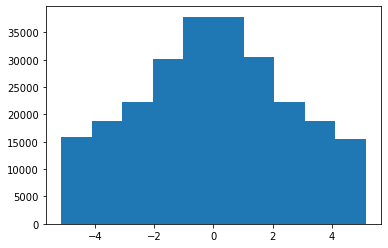

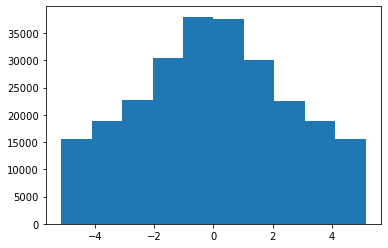

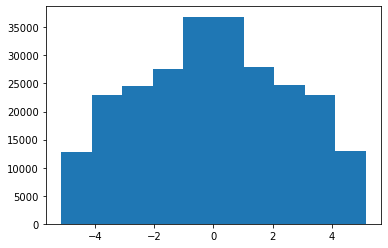

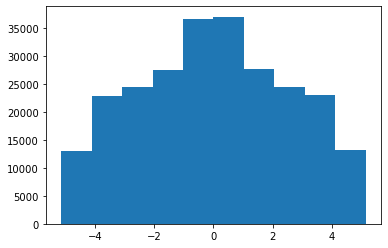

In [57]:
for i in range(22):
    plot = plt.hist(z[i])
    plt.show()

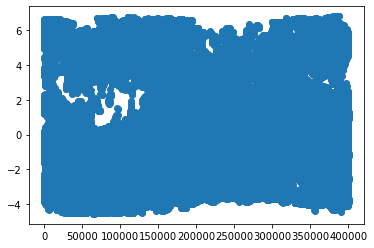

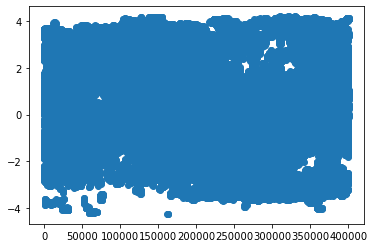

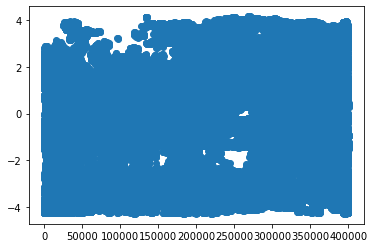

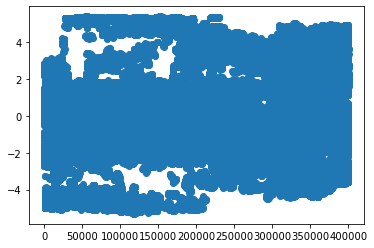

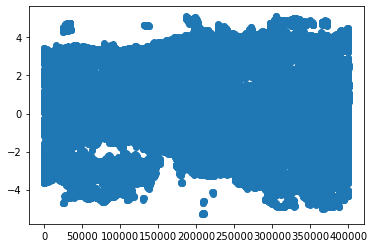

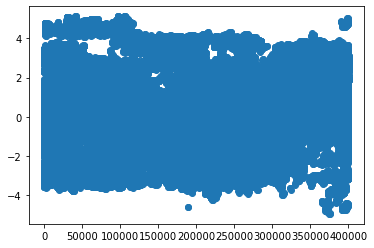

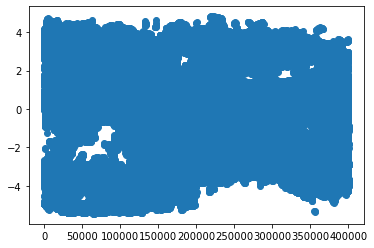

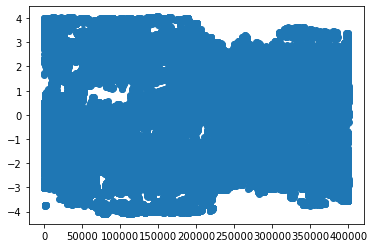

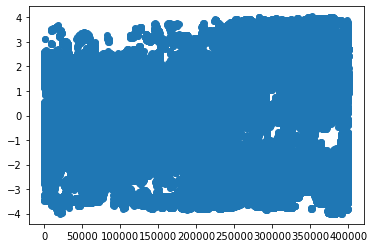

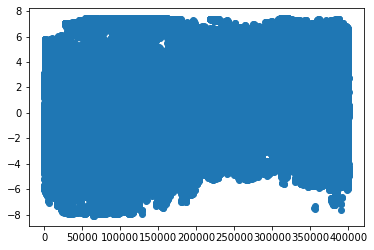

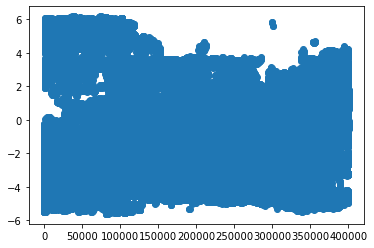

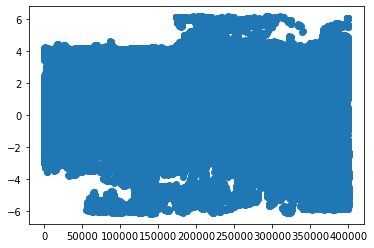

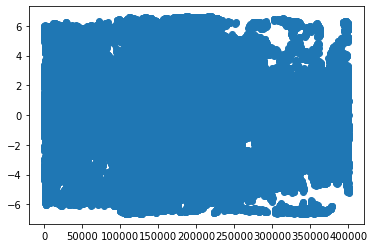

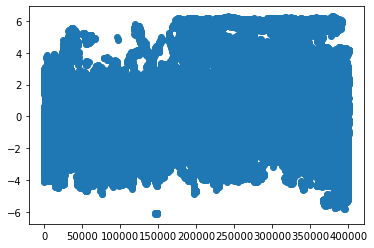

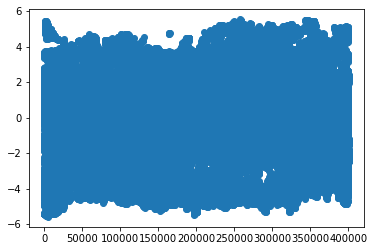

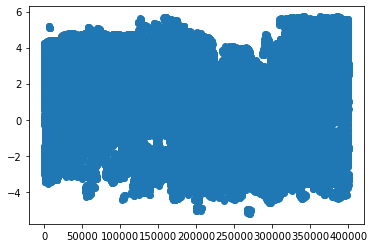

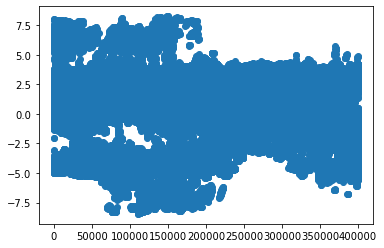

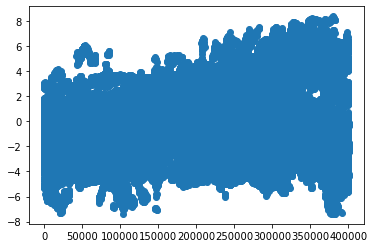

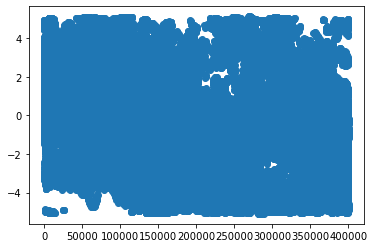

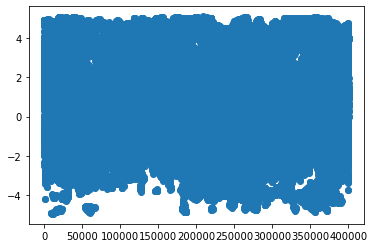

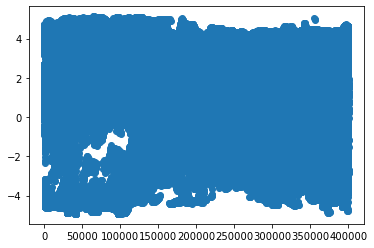

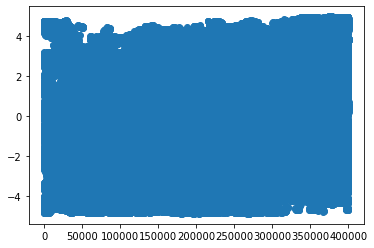

In [19]:
for i in range(22):
    plot = plt.scatter(range(400198), X_T[i])
    plt.show()

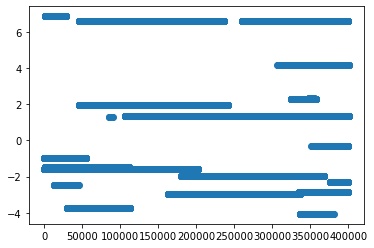

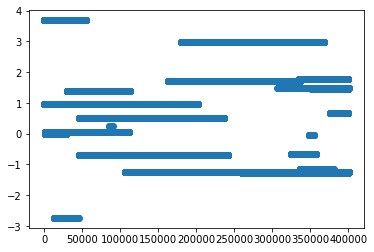

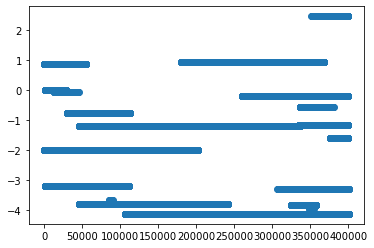

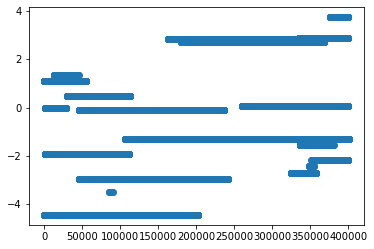

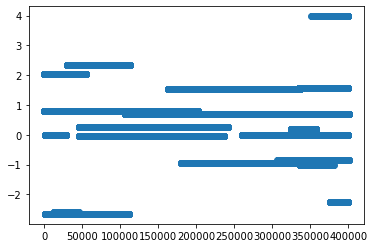

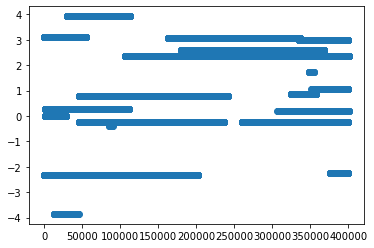

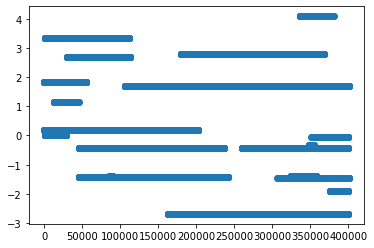

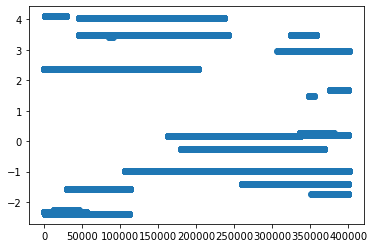

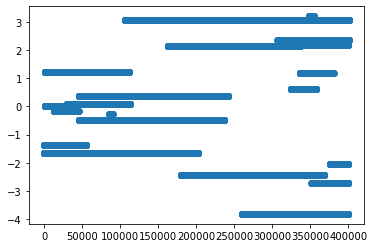

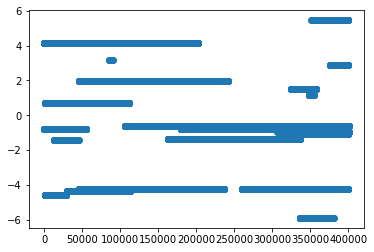

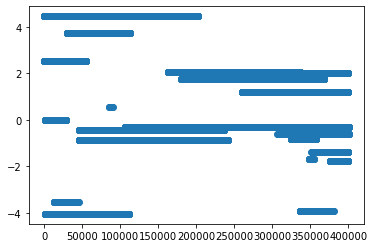

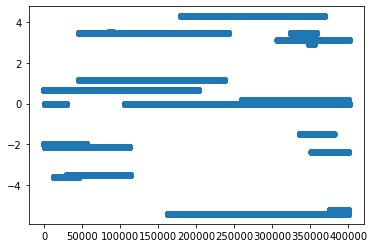

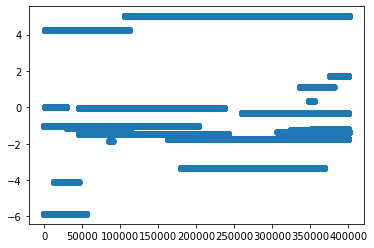

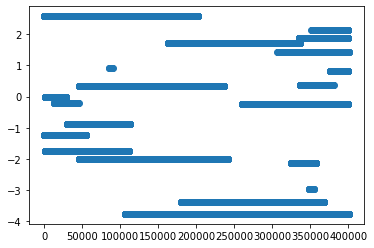

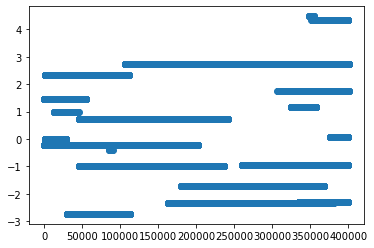

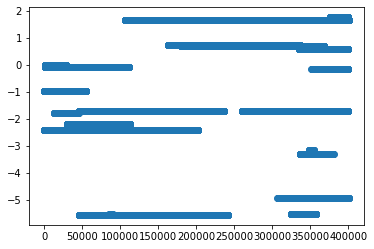

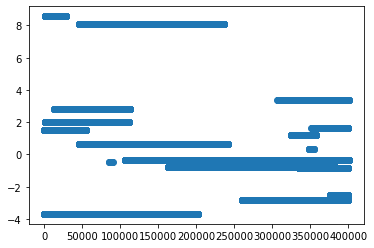

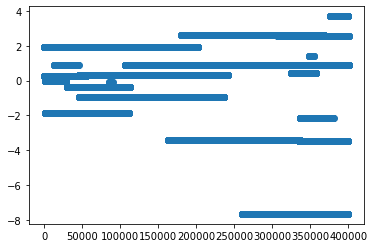

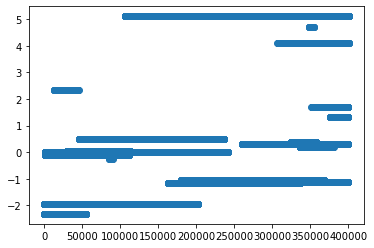

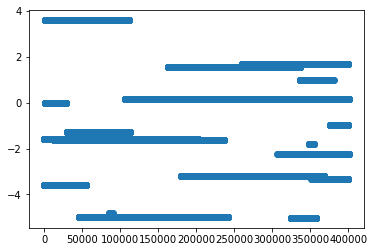

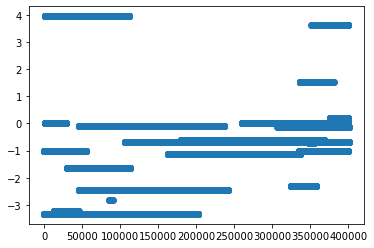

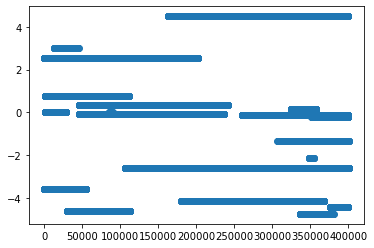

In [20]:
for i in range(22):
    plot = plt.scatter(range(400198), y_T[i])
    plt.show()

In [21]:
X_T_R = X_T.reshape((22, 499, 802))

In [22]:
X_T_R.shape

(22, 499, 802)

In [40]:
X_T_R[0][498][801]

1.22805759902555

In [ ]:
file = open("fichier_test.txt", "w+")
for line in range(499):
    for column in range(802):
        file.write(str(X_T_R[0][line][column]))
        print("\t")
    print("\n")
file.close()

In [41]:
# Build the model
inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNEL))
# convert to float
s = tf.keras.layers.Lambda(lambda x: x / 7)(inputs)

In [42]:
# Contraction path
c1 = tf.keras.layers.Conv2D(22, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(22, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(44, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(88, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)


In [44]:
# Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

outputs = tf.keras.layers.Conv2D(22, (1, 1), activation="sigmoid")(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 400, 248, 32), (None, 400, 249, 32)]

In [ ]:
# Model checkpoint
checkpointer = tf.keras.callbacks.Modelcheckpoint("mon_modele.h5", verbose=1, save_best_only=True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss"),
    tf.keras.callbacks.TensorBoard(log_dir="logs")
]

results = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=16,
    ecpochs=25,
    callbacks=callbacks
)

In [ ]:
idx = random.randint(0, len(X_train))
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose = 1)

In [ ]:
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

In [ ]:
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

In [ ]:
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()
